# **UTS Machine Learning**
# **Nama: Ahmad Harits Burhani**
# **NIM: 1103210153**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from google.colab import drive
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [2]:
# Hubungkan ke Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSV/KlasifikasiUTS.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [5]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

##################### Shape #####################
(284807, 31)
##################### Types #####################
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
##################### Head #####################
   Time     V1     V2    V3     V4     V5     V6     V7     V8     V9    V10    V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class
0 0.000 -1.360 -0.073 2.536  1.378 -0.338  0.462

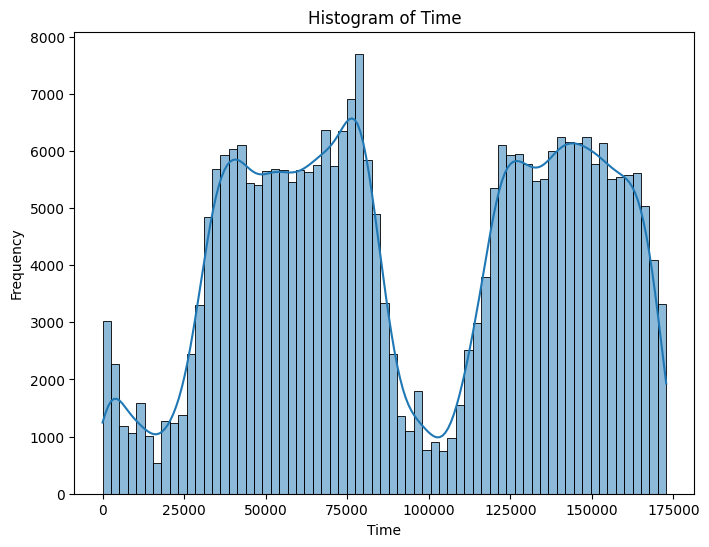

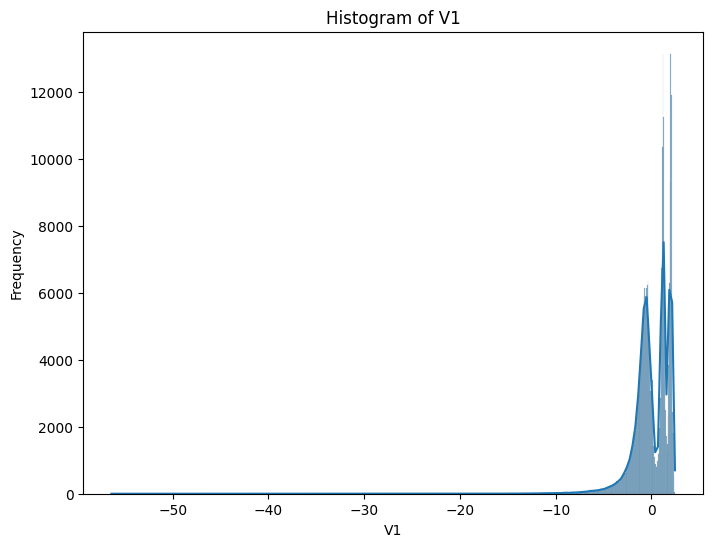

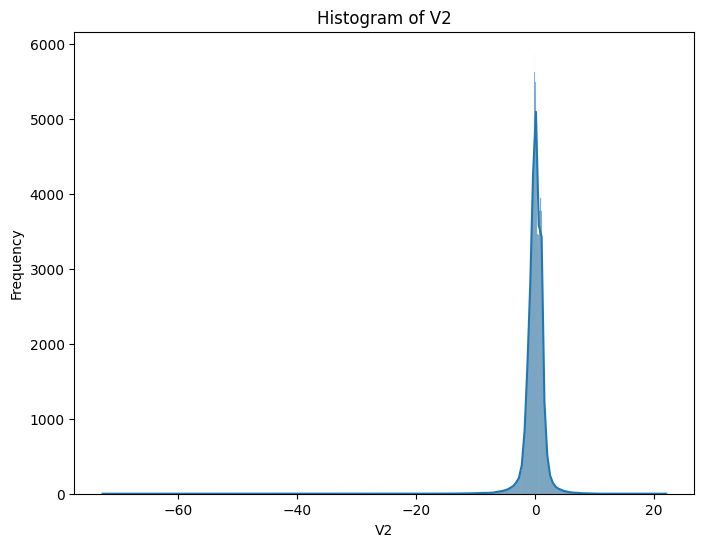

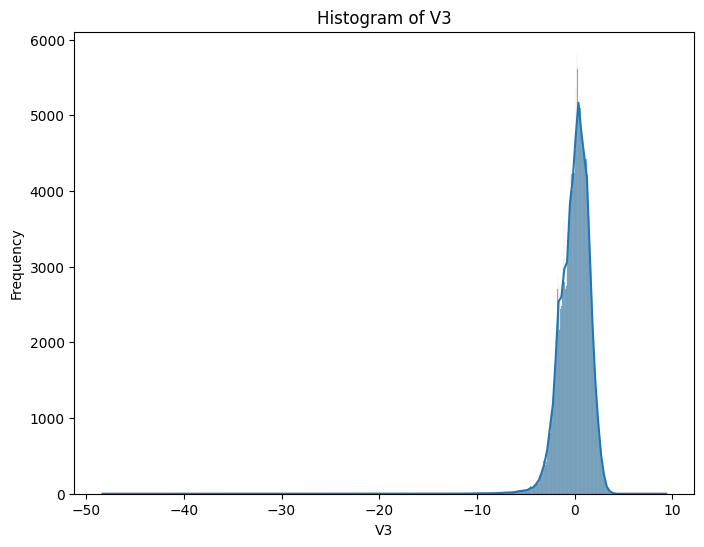

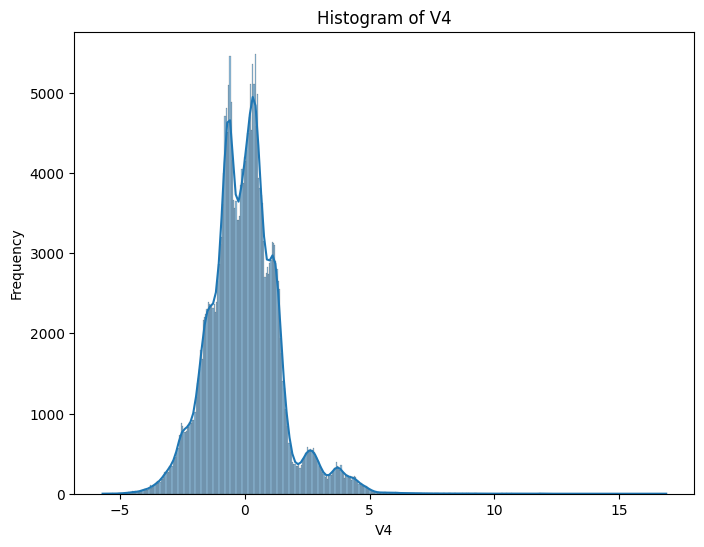

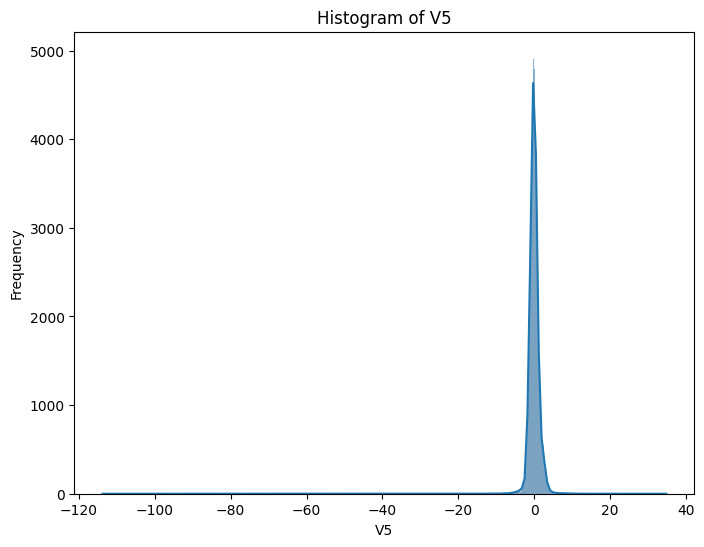

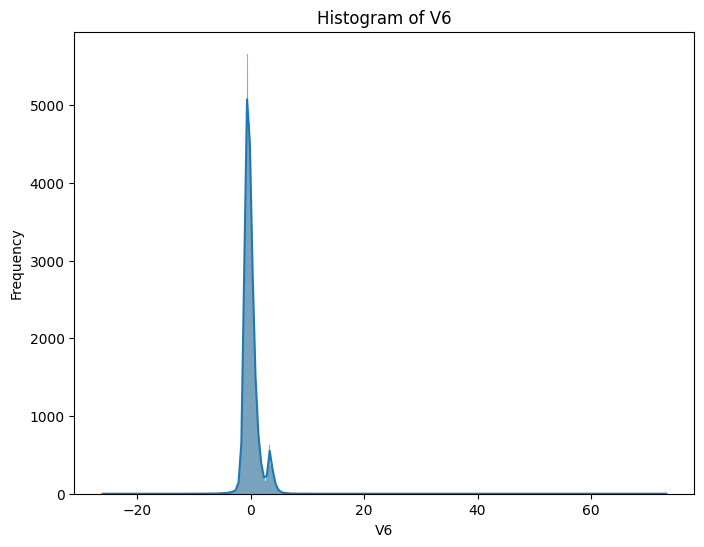

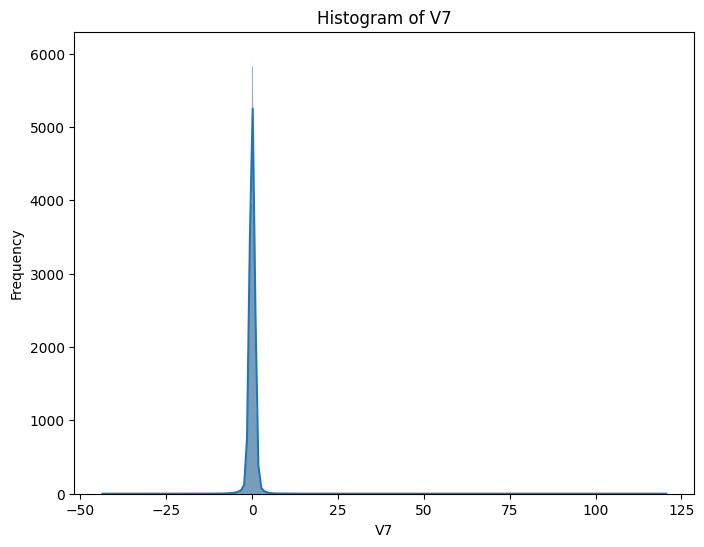

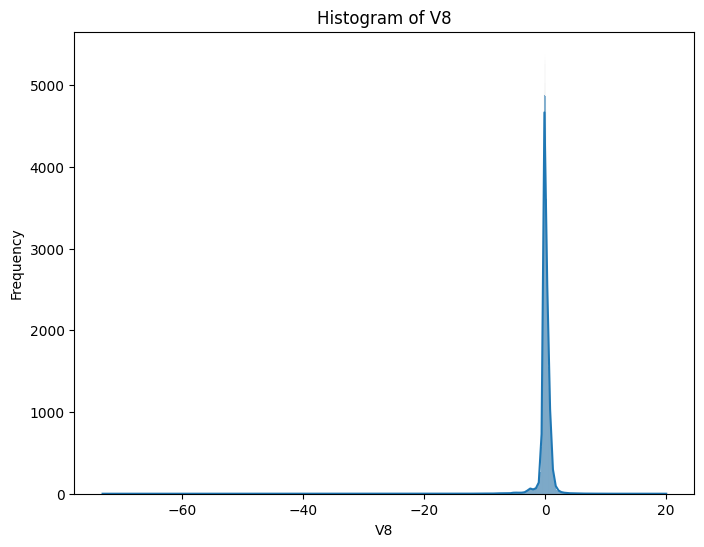

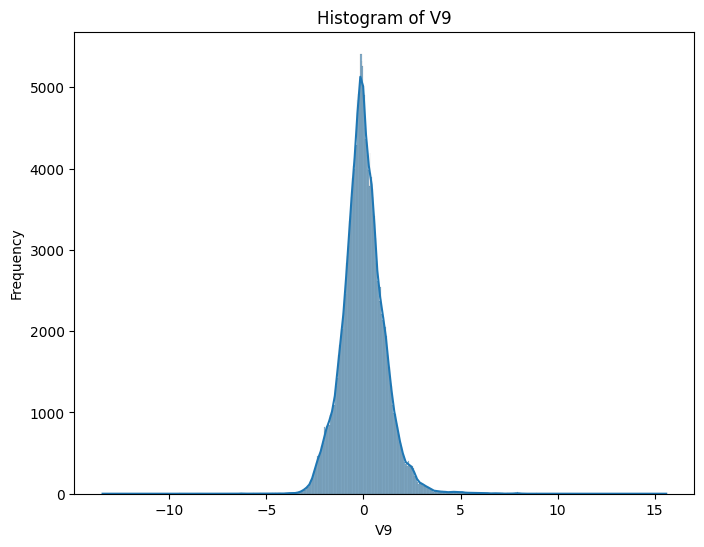

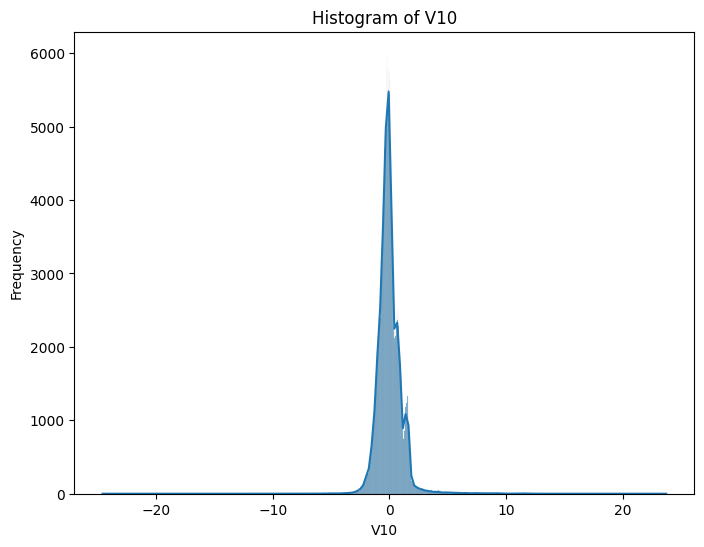

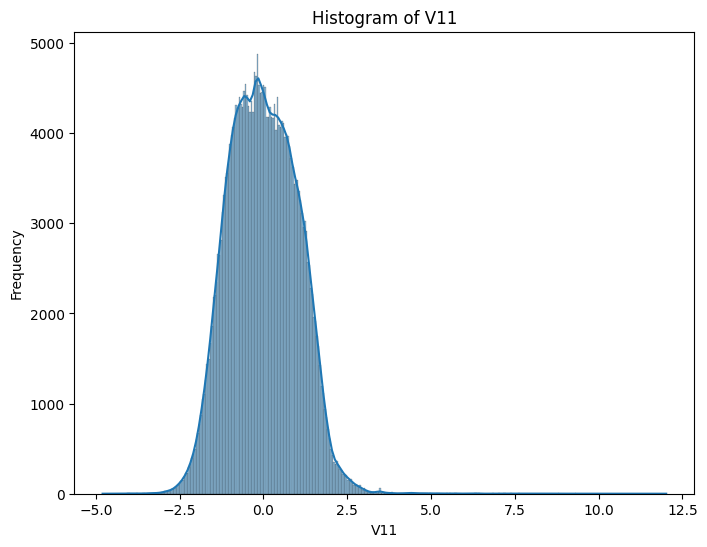

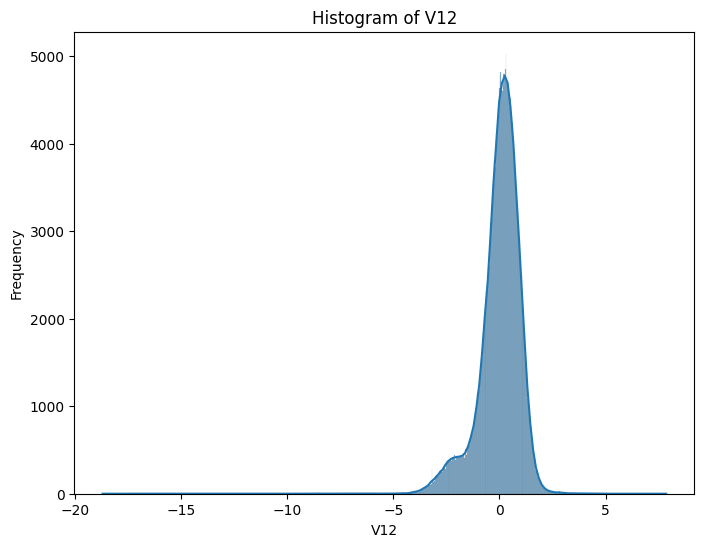

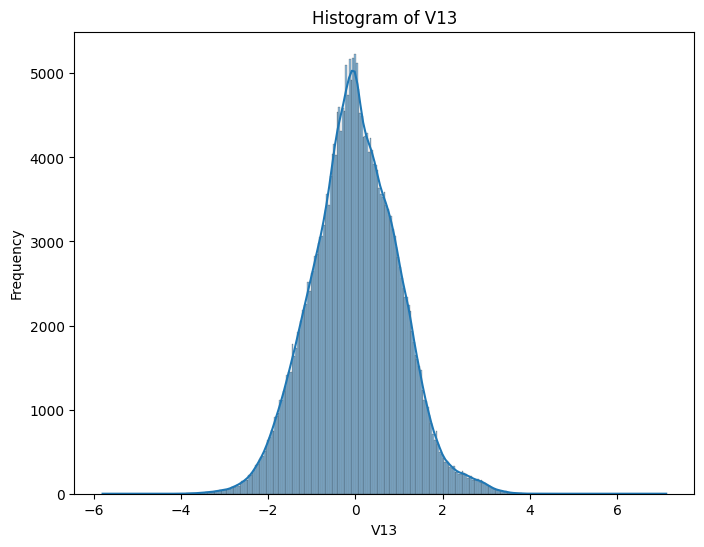

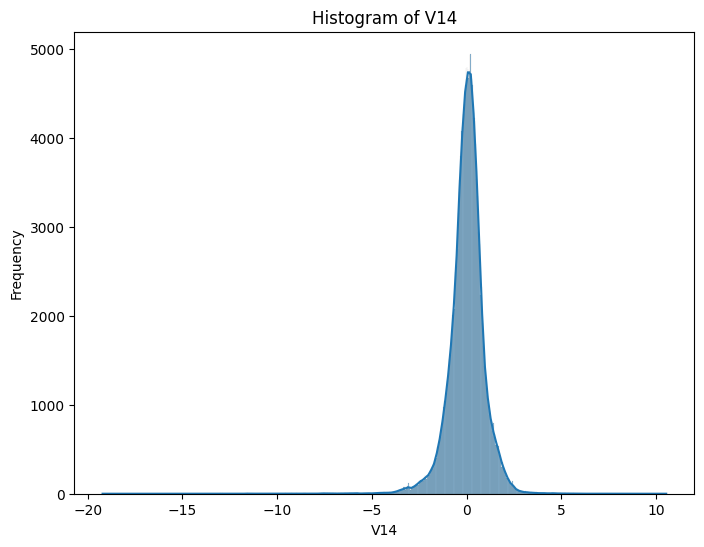

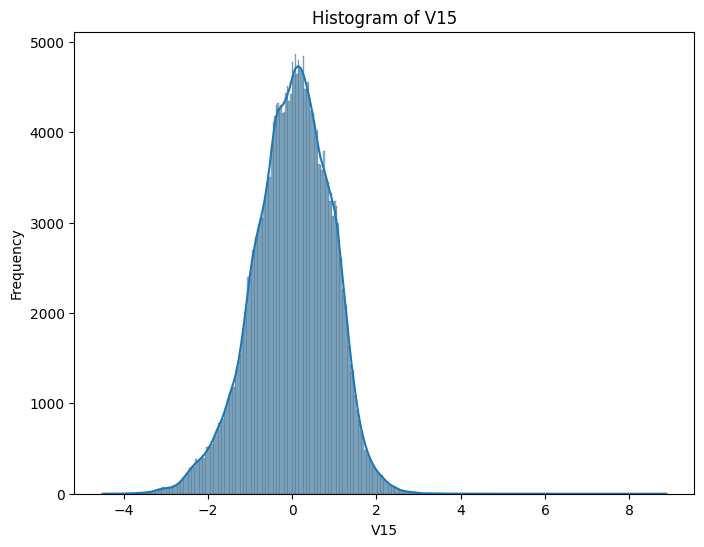

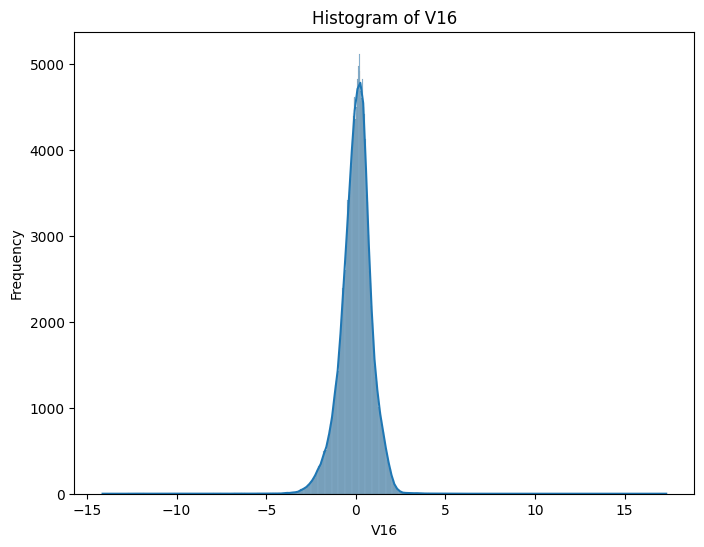

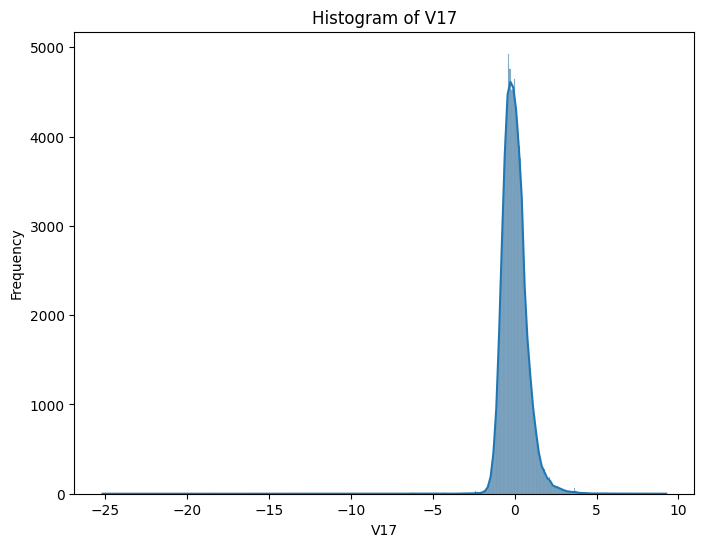

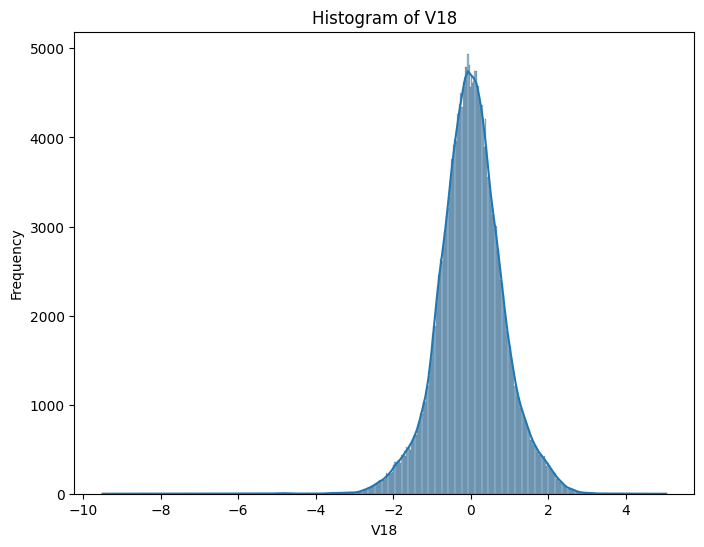

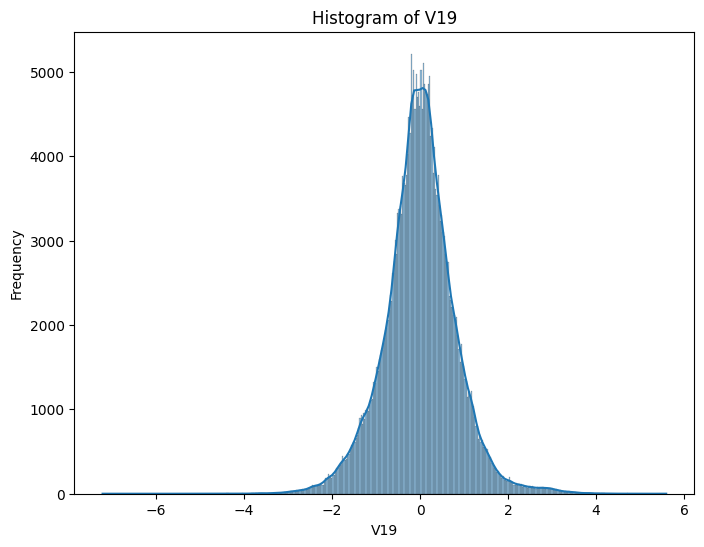

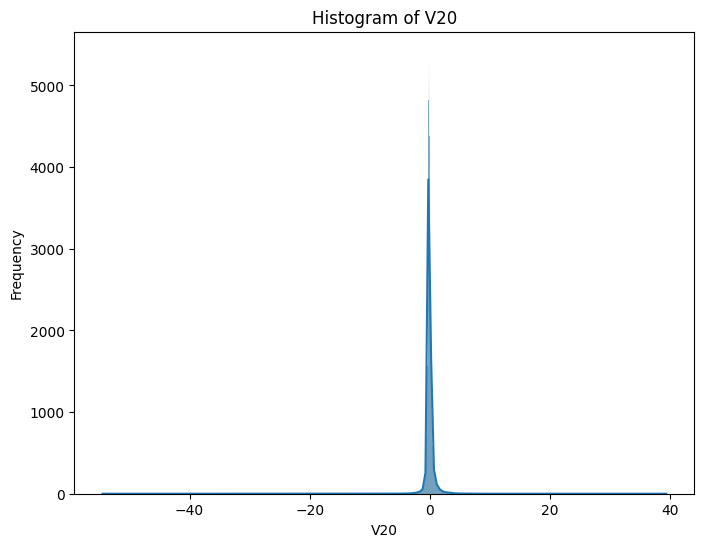

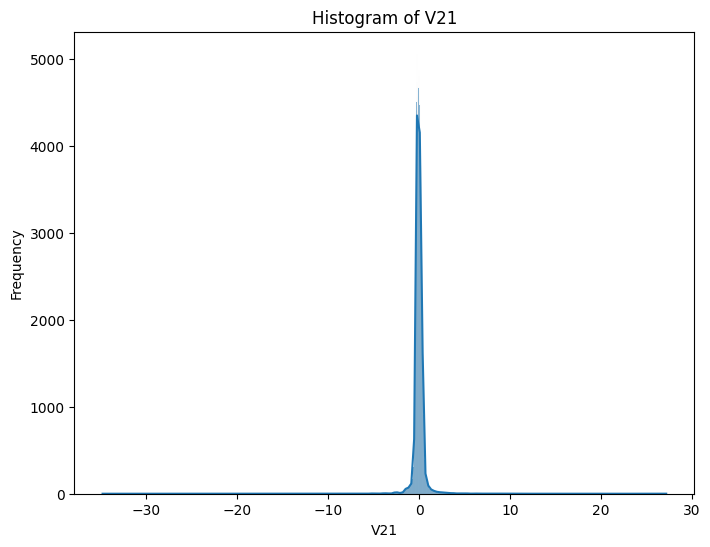

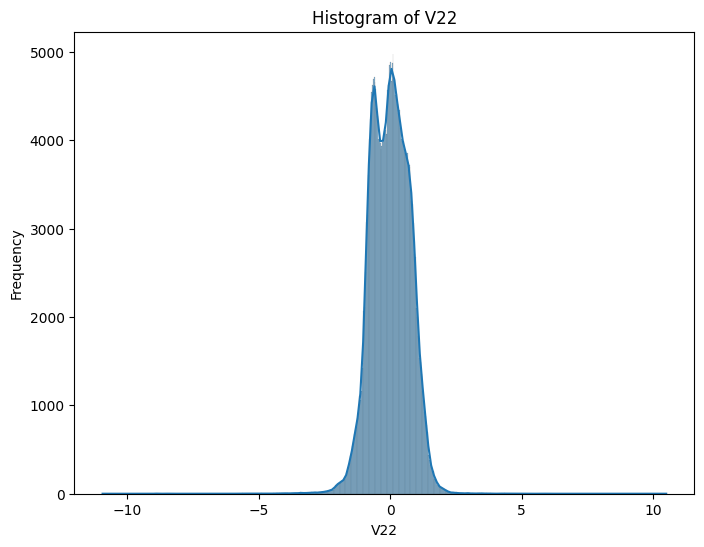

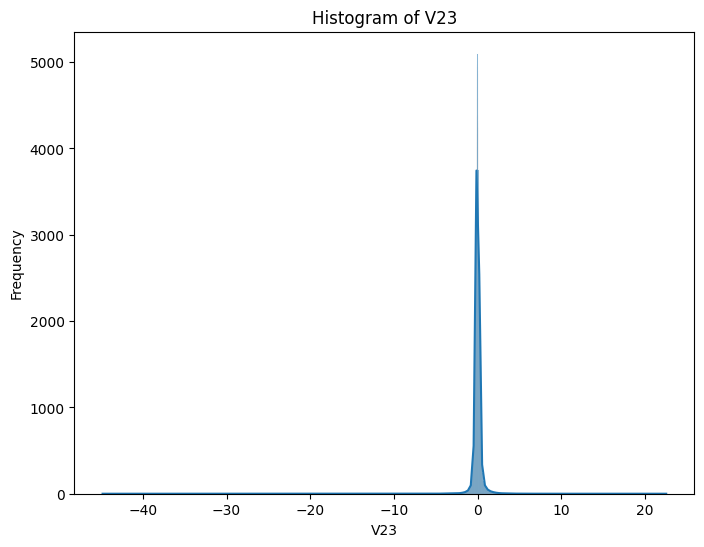

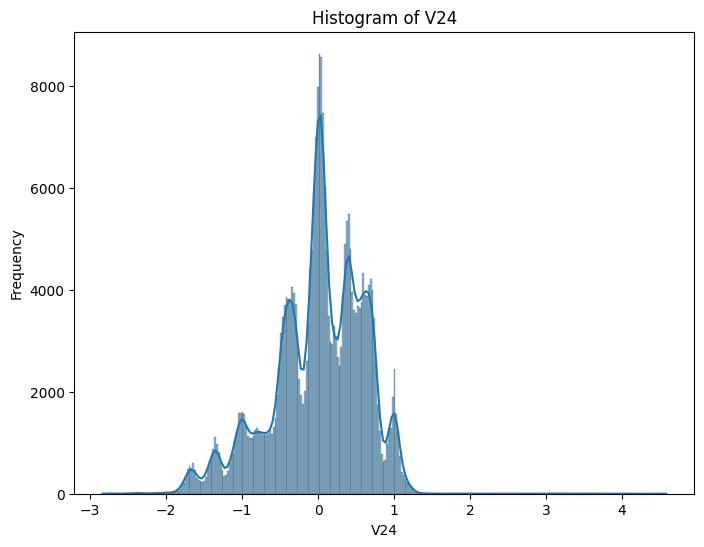

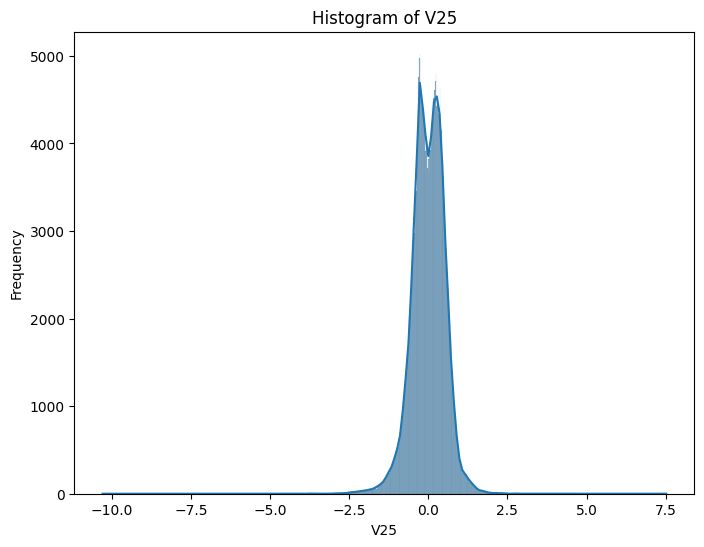

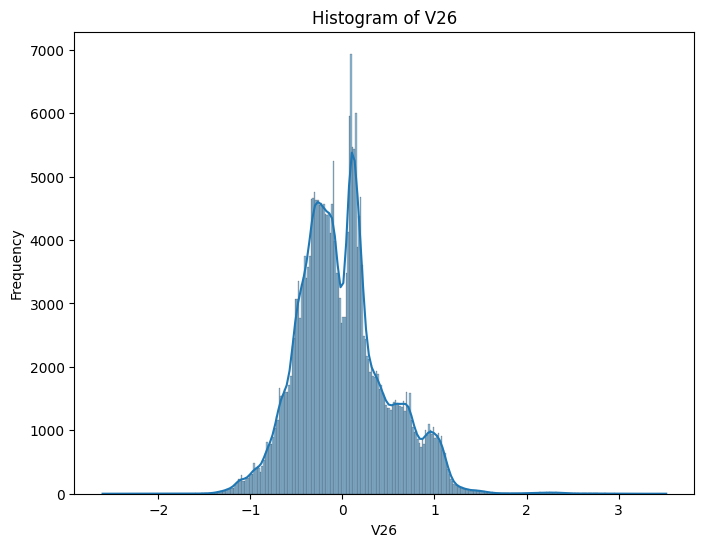

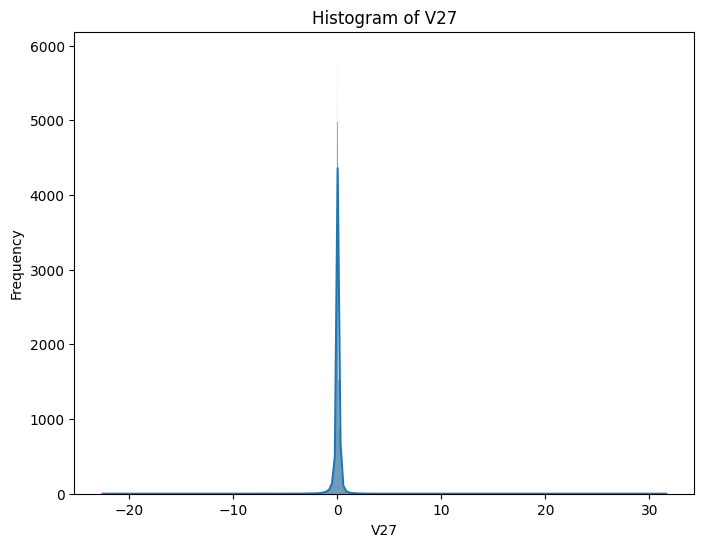

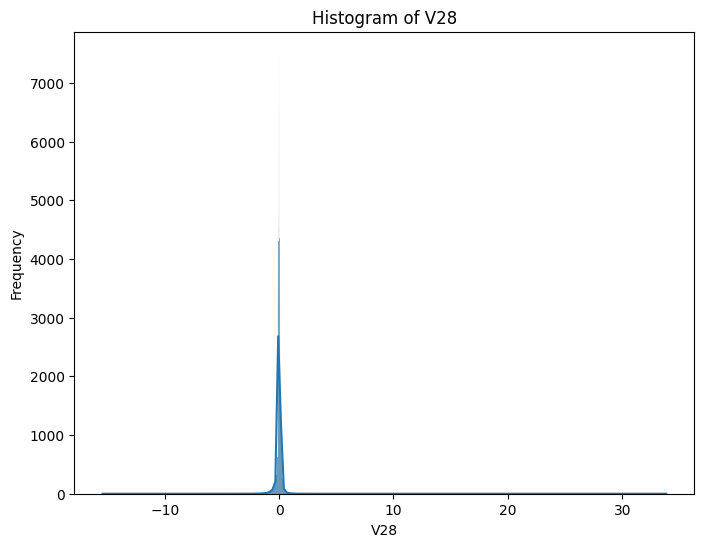

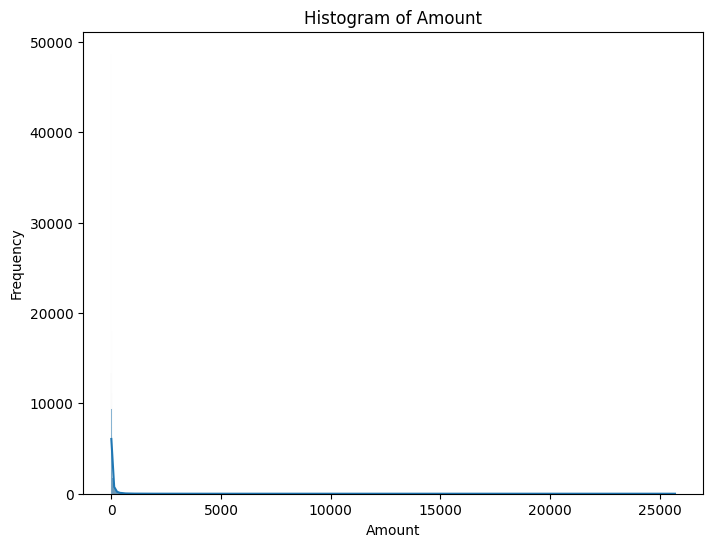

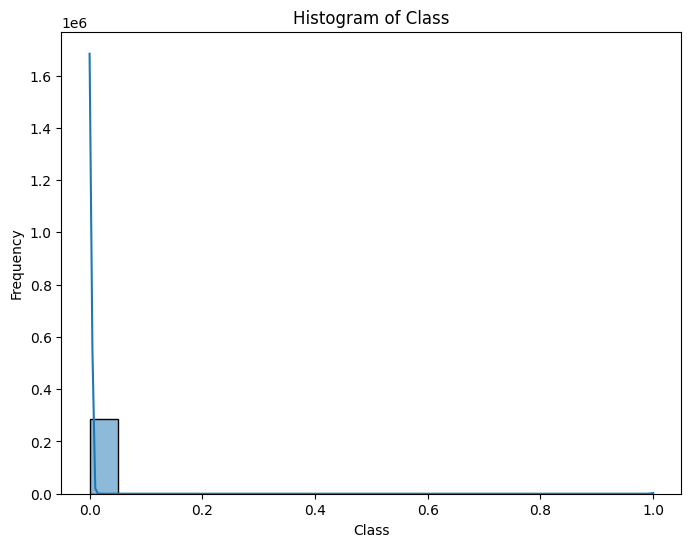

In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns


for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

# 1. Pembersihan & Preprocessing
# Pisahkan fitur dan target
X = df.drop(columns="Class")
y = df["Class"]

# Normalisasi kolom 'Amount' dan 'Time'
scaler = StandardScaler()
X[["Amount", "Time"]] = scaler.fit_transform(X[["Amount", "Time"]])

# 2. Feature Selection
# a. Remove constant/quasi-constant features
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)
selected_features = X.columns[selector.get_support()]

# b. Mutual Information untuk top 10 fitur
mi_selector = SelectKBest(mutual_info_classif, k=10)
X_mi = mi_selector.fit_transform(X[selected_features], y)
mi_features = selected_features[mi_selector.get_support()]

# Gunakan hanya fitur hasil mutual information untuk modeling
X_final = X[mi_features]

# Train-test split (stratify untuk seimbangkan distribusi target)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape, mi_features.tolist()


((199364, 10),
 (85443, 10),
 ['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'])

<Axes: >

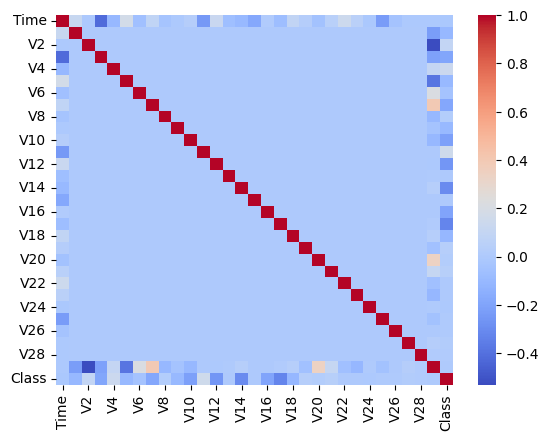

In [15]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

<Axes: xlabel='Amount', ylabel='Count'>

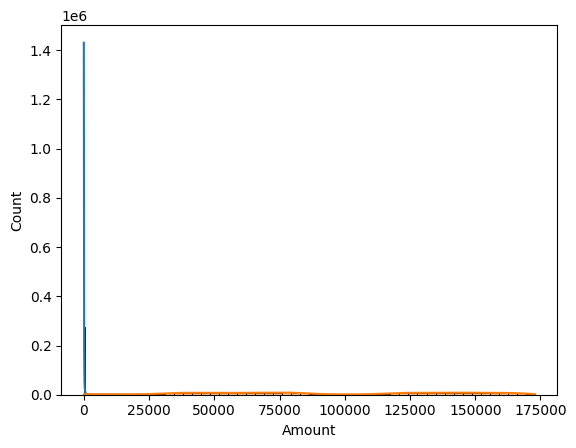

In [16]:
sns.histplot(df['Amount'], bins=50, kde=True)
sns.histplot(df['Time'], bins=50, kde=True)

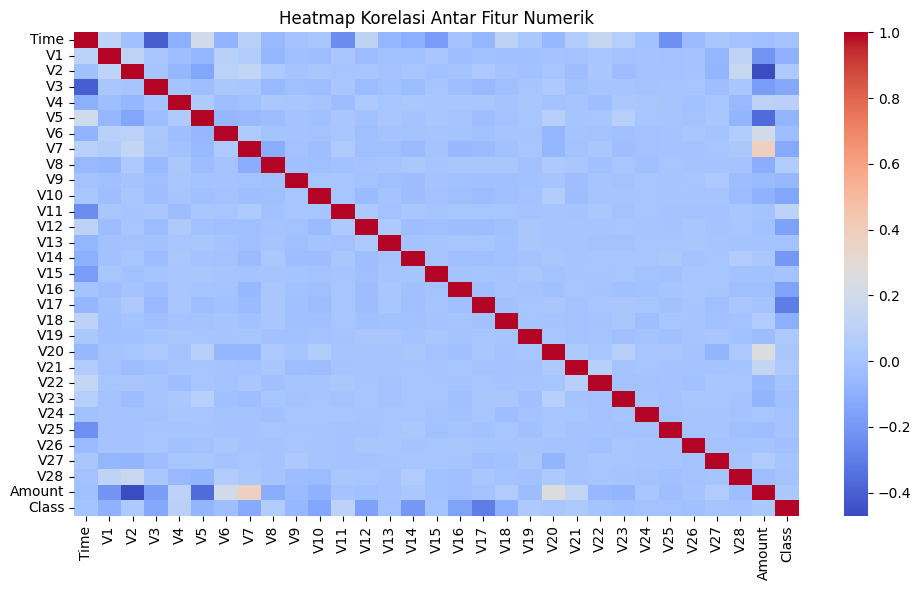

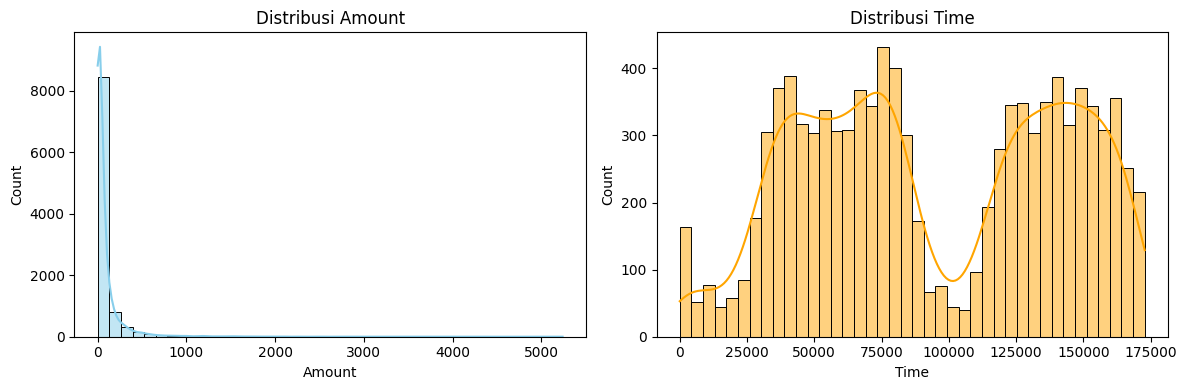

<ipython-input-18-0a3c69a0faed>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_vis, x="Class", palette="pastel")


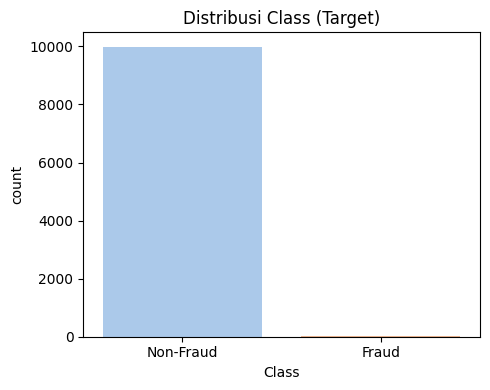

In [18]:
# Ambil subset data agar visualisasi tidak berat
df_vis = df.sample(n=10000, random_state=42)

# 1. Korelasi fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df_vis.corr(numeric_only=True), annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.tight_layout()
plt.show()

# 2. Distribusi kolom 'Amount' dan 'Time'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_vis["Amount"], kde=True, ax=axes[0], bins=40, color='skyblue')
axes[0].set_title("Distribusi Amount")
sns.histplot(df_vis["Time"], kde=True, ax=axes[1], bins=40, color='orange')
axes[1].set_title("Distribusi Time")
plt.tight_layout()
plt.show()

# 3. Perbandingan jumlah class
plt.figure(figsize=(5, 4))
sns.countplot(data=df_vis, x="Class", palette="pastel")
plt.title("Distribusi Class (Target)")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()


1. Jika model Machine Learning menunjukkan AUC-ROC tinggi (0.92) tetapi Presisi sangat rendah (15%) pada dataset tersebut, jelaskan faktor penyebab utama ketidaksesuaian ini! Bagaimana strategi tuning hyperparameter dapat meningkatkan Presisi tanpa mengorbankan AUC-ROC secara signifikan? Mengapa Recall menjadi pertimbangan kritis dalam konteks ini, dan bagaimana hubungannya dengan cost false negative?
# Jawab:
Ketidaksesuaian antara AUC-ROC yang tinggi dan presisi yang rendah biasanya disebabkan oleh ketidakseimbangan kelas, di mana model cukup baik dalam membedakan kelas secara umum, tetapi tetap menghasilkan banyak false positive. Strategi tuning seperti menaikkan threshold klasifikasi atau menerapkan class weight balancing bisa meningkatkan presisi tanpa mengorbankan AUC secara signifikan. Recall menjadi sangat penting dalam konteks di mana false negative berdampak besar, seperti diagnosis penyakit, karena model harus meminimalkan kasus yang terlewat meskipun mengorbankan presisi.

2. Sebuah fitur kategorikal dengan 1000 nilai unik (high-cardinality) digunakan dalam model machine learning. Jelaskan dampaknya terhadap estimasi koefisien dan stabilitas Presisi! Mengapa target encoding berisiko menyebabkan data leakage dalam kasus dataset tersebut, dan alternatif encoding apa yang lebih aman untuk mempertahankan AUC-ROC?
# Jawab:
Fitur kategorikal dengan 1000 nilai unik dapat menyebabkan overfitting karena model cenderung menghafal data ketimbang belajar pola umum, yang berdampak negatif pada estimasi koefisien dan menurunkan stabilitas presisi. Target encoding berisiko menyebabkan data leakage karena informasi dari label target bisa bocor ke proses pelatihan. Alternatif yang lebih aman adalah menggunakan frequency encoding atau hashing trick yang mempertahankan representasi tanpa mengandalkan label target secara langsung, sehingga tetap mendukung AUC-ROC yang stabil.

3.  Setelah normalisasi Min-Max, model SVM linear mengalami peningkatan Presisi dari 40% ke 60% tetapi Recall turun 20%. Analisis dampak normalisasi terhadap decision boundary dan margin kelas minoritas! Mengapa scaling yang sama mungkin memiliki efek berlawanan jika diterapkan pada model Gradient Boosting?
# Jawab:
Normalisasi Min-Max dapat mempersempit rentang fitur, yang membuat decision boundary pada SVM linear lebih tajam dan presisi meningkat. Namun, hal ini bisa menyebabkan margin untuk kelas minoritas menjadi lebih kecil, sehingga recall menurun karena model kurang toleran terhadap variasi minoritas. Sebaliknya, pada model seperti Gradient Boosting, scaling fitur tidak selalu diperlukan karena pohon keputusan tidak sensitif terhadap skala, dan justru bisa mengacaukan pemilihan split terbaik.

4. Eksperimen feature interaction dengan menggabungkan dua fitur melalui perkalian meningkatkan AUC-ROC dari 0.75 ke 0.82. Jelaskan mekanisme matematis di balik peningkatan ini dalam konteks decision boundary non-linear! Mengapa uji statistik seperti chi-square gagal mendeteksi interaksi semacam ini, dan metode domain knowledge apa yang dapat digunakan sebagai alternatif?
# Jawab:
Peningkatan AUC-ROC setelah menambahkan fitur interaksi disebabkan karena model mendapatkan representasi non-linear yang lebih kaya, sehingga decision boundary menjadi lebih fleksibel. Chi-square gagal mendeteksi interaksi semacam ini karena hanya mengukur hubungan linier antara dua variabel kategorikal terhadap target, bukan efek gabungan. Domain knowledge seperti pemahaman konteks bisnis atau teknik seperti mutual information dapat membantu mengidentifikasi interaksi relevan yang tidak ditangkap statistik sederhana.

5. Dalam pipeline preprocessing, penggunaan oversampling sebelum pembagian train-test menyebabkan data leakage dengan AUC-ROC validasi 0.95 tetapi AUC-ROC testing 0.65. Jelaskan mengapa temporal split lebih aman untuk fraud detection, dan bagaimana stratified sampling dapat memperparah masalah ini! Bagaimana desain preprocessing yang benar untuk memastikan evaluasi metrik Presisi/Recall yang realistis?
# Jawab:
Oversampling sebelum membagi data train-test menyebabkan model belajar dari data yang seharusnya tidak diketahui saat evaluasi, sehingga metrik validasi menjadi terlalu optimis dan tidak realistis. Temporal split lebih aman untuk kasus fraud detection karena menjaga urutan waktu dan mencegah bocornya informasi masa depan ke masa lalu. Stratified sampling bisa memperparah masalah karena membuat distribusi target di train dan test mirip, menghilangkan skenario dunia nyata. Preprocessing yang benar adalah melakukan oversampling hanya pada training set setelah pembagian data, agar evaluasi presisi dan recall mencerminkan kinerja model pada data yang benar-benar baru.
